In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as clt
from matplotlib import cm
import pandas as pd
import numpy as np

## Wykres cukierkowy (giełdowy)

Wykres prezentuje zmiany notowań giełdowych. Wykres się składa z dwóch osobncyh wykresów, dolnego i górnego, pomiędzy którymi usunięto osie poziome w celu sprawienia wrażenia że jest to jeden wykres. Wysokości pudełek: szerokie to różnica między otwarciem a zamknięciem, i cienkieg - maksimum i minimum dnia.

In [21]:
stock = pd.read_csv("dane/stock.csv")
aa = stock[stock.stock=='AA']
aa.head()

,stock,date,open,high,low,close,volume,days_to_next_dividend,percent_return_next_dividend
0,AA,01/07/11,15.82,16.72,15.78,16.42,239655616,26,0.182704
1,AA,01/14/11,16.71,16.71,15.64,15.97,242963398,19,0.187852
2,AA,01/21/11,16.19,16.38,15.60,15.79,138428495,12,0.189994
3,AA,01/28/11,15.87,16.63,15.82,16.13,151379173,5,0.185989
4,AA,02/04/11,16.18,17.39,16.18,17.14,154387761,97,0.175029


1. Ustawienie siatki wykresu, odległość pomiędzy wykresami 0, proporcje: 2:1
2. Utworzenie mapy kategoryzacyjnej dwukolorowej 
3. Usunięcie osi łączących dolny i górny wykres
4. Przemieszczenie pozycji etykiety na drugą stronę
5. Formatowanie etykiety przy pomocy poleceń latexa (wzory, indeksy, itp)
6. Sformatowanie etykiet w 100 mln. ($10^8$)

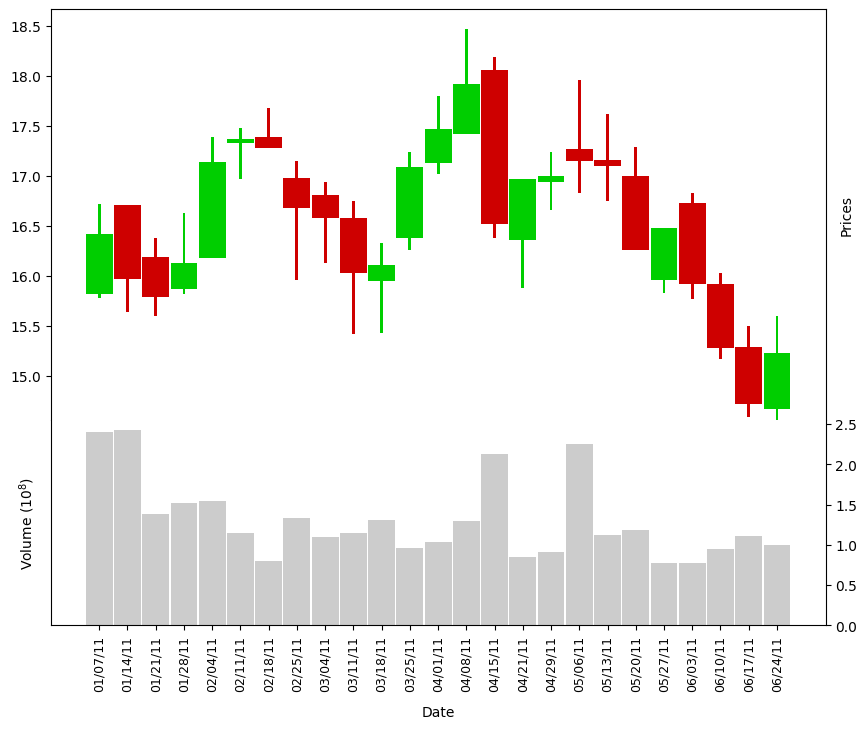

In [22]:
plt.style.use("default")
gsk = {'hspace': 0,'height_ratios':[2,1]} #1
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,8),gridspec_kw=gsk)
bar_height = aa.close-aa.open
line_height = aa.high-aa.low
colormap = clt.ListedColormap(["#ce0000","#00ce00"],name='listed') #2 
colors = np.sign(bar_height)

ax1.bar(x=aa.date,bottom=aa.open,height=bar_height,color=colormap(colors),width=0.95,zorder=10)
ax1.bar(x=aa.date,bottom=aa.low,height=line_height,color=colormap(colors),width=0.1,zorder=10)
ax1.spines.bottom.set_visible(False) #3
ax1.xaxis.set_tick_params(bottom=False,labelbottom=False)
ax1.set_ylabel("Prices",labelpad=10)
ax1.yaxis.set_label_position('right') #4

ax2.bar(x=aa.date,height=aa.volume,color="#CCCCCC",width=0.95,zorder=1)
ax2.yaxis.set_ticks_position('right')
ax2.spines.top.set_visible(False)
ax2.set_xlabel("Date",labelpad=10)
ax2.set_ylabel("Volume ($10^8$)",labelpad=10) #5
ax2.yaxis.set_major_formatter(lambda x, pos: str(x/1e8)) #6
ax2.xaxis.set_tick_params(labelrotation=90,labelsize=9)

## Wykres sprzedażowy

Wykres pokazujący zysk, względem wielkości sprzedaży. Wielkość sprzedaży w sztukach pokazana jest w latach rozliczeniowych, które rozpoczynają sie w październiku poprzedniego roku. Wykonie wykresu polega na nałożeniu na siebie wykresów bliźniaczych. Zróznicowana kolorystyka co drugi rok została wykonana poprzez wyznacznie odcinków parzystych i nieparzystych co 12 miesięcy, niezależenie od miesiąca startowego.

In [23]:
sales = pd.read_csv('dane/sales.csv',index_col="Date")
sales.index = pd.to_datetime(sales.index)
sales.head()

,Sales_Dollars,Quantity
Date,,
2009-10-01,338630,2160
2009-11-01,339386,785
2009-12-01,400264,2118
2010-01-01,314640,2544
2010-02-01,311022,1288


1. Wykresy bliźniacze
2. Ilczba elementów dla której zmieniamy kolor w celu tworzenia selektora
    - (A) reszta dzielenia roku przez 2 w celu podziału na lata parzyste i nieparzyste
    - (B) liczba obiektów podzielona przez liczbę miesięcy a następnie reszta z dzielenia przez 2 (parzyste/nieparzyste), potrzebne gdy rok rozliczeniowy nie jest równy kalendarzowemu
3. Usunięcie siatki dla bliźniaczego wykresu, siatka jest zdefiniowana w stylu
4. Przygotowanie etykiet zaczników.
    - (A) tworzenie etykiet poprzez wyrysowanie wykresu
    - (B) Pobranie etykiet
    - (C) przesunięcie znaczników, usunięcie pierwszego elementu (rok 2009)

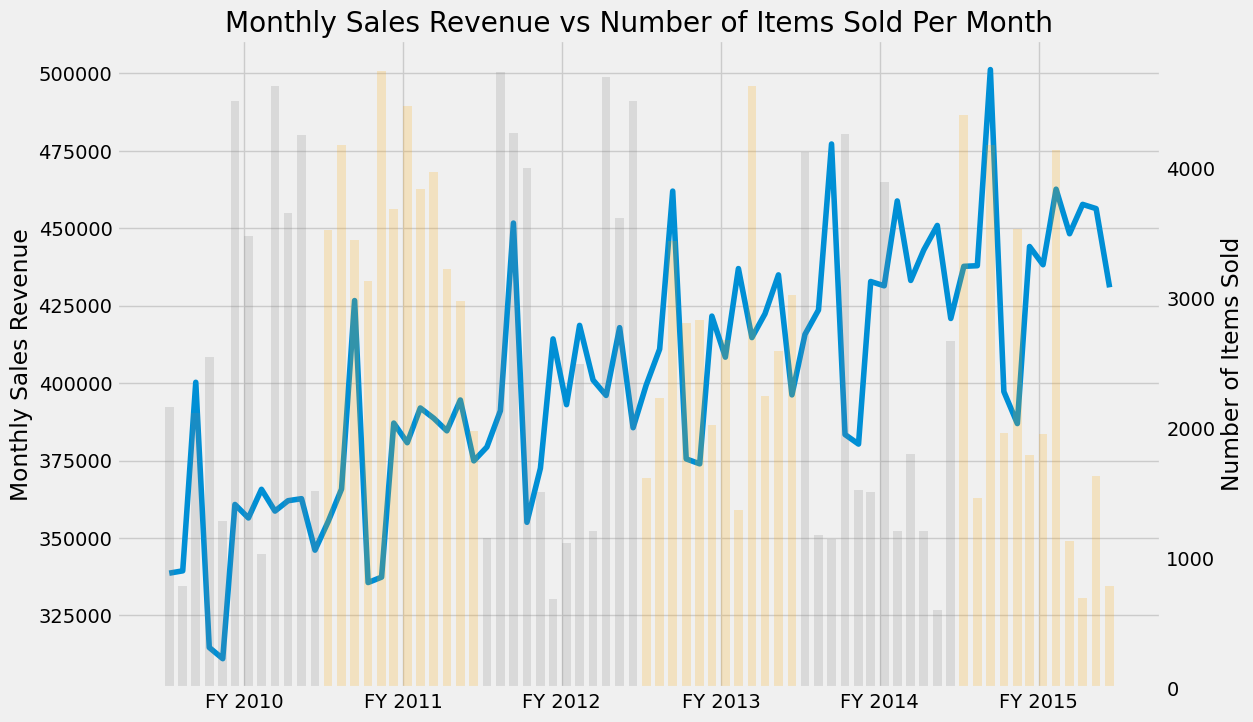

In [24]:
plt.style.use('fivethirtyeight')

alt = 12 #2 alternate 
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx() #1
ax1.plot(sales.Sales_Dollars)
#selector = sales.index.year%2 == 1 #2A
selector = np.arange(len(sales))//alt%2 == 1 #2B dzielenie całkowite
orange_bars = sales[selector]
gray_bars = sales[~selector]
ax2.bar(orange_bars.index,orange_bars.Quantity,width=20, alpha=0.2, color='orange')
ax2.bar(gray_bars.index,gray_bars.Quantity,width=20, alpha=0.2, color='gray')

ax2.grid(visible=False) #3 turn off grid #3
ax1.set_title('Monthly Sales Revenue vs Number of Items Sold Per Month')
ax1.set_ylabel('Monthly Sales Revenue')
ax2.set_ylabel('Number of Items Sold')

plt.draw() #4A aby tick zadziałało
labels = ["FY {}".format(t.get_text()) for t in ax1.get_xticklabels()] #4B Pobranie etykiet
_ = ax1.set_xticks(ticks=ax1.get_xticks()[1:]+80,labels=labels[1:]) #4C usuwamy etykietę 2009 i przesuwamy ticks o około 80 dni

Zadanie:

> Napisać funkcję, która wykona taki sam wykres dla dowolnego zbioryu danych o takiej samej strukturze. Jako danych wejściowych funkcji użyć tego samego zbioru danych. Należy określić jakie kolumny zbioru danych pełnią jaką rolę.

Zadanie:

> Napisać funkcję, która utworzy wykres dla tego samego zbioru danych, ale pozwoli wybrać firmę jako parametr. Fukcja powinna przyjmować jako parametry: zbiór danych (obowiązkowy), symbol spółki (obowiązkowy), zakres czasu (domyślnie cały czas). Należy określić jakie kolumny zbioru danych pełnią jaką rolę.

## Wykres zachorowania i zgony w wyniku raka

In [25]:
dt = pd.read_csv("dane/cancer.csv",index_col='diseases')
dt

,men_deaths,men_cases,women_deaths,women_cases
diseases,,,,
Kidney Cancer,10000,30000,6000,20000
Bladder Cancer,12000,50000,5500,18000
Esophageal Cancer,13000,13000,5000,5000
Ovarian Cancer,0,0,20000,25000
Liver Cancer,14000,16000,9000,9000
Non-Hodgkin's\nlymphoma,12000,30000,12000,29000
Leukemia,16000,25000,13000,24000
Prostate Cancer,25000,220000,0,0
Pancreatic Cancer,20000,22000,19000,21000


1. Ustawienie znaczników na górze i po prawj
2. Niestandardowe ustawienie zakresu osi,
   - (A) na liczbę ujemą oraz względem wielkosci zdefiniowanej rozmiarem wykresu
   - (B) wartości ustawiamy tylko dla lewego wykresu, prawy korzysta z osi wykresu lewego
3. Wartości na osiach rosną odwrotnie
4. Wykres right jest kopią left, poza drobiazgami
5. Położenie etykiet na osiach formatujemy względem odległości pomiędzy wykresami
6. Znaczniki i etykiety znaczników ustawiane względem zakresu danych
7. Adnotacje ustawiane względem danych tylko dla jednego z wykresów

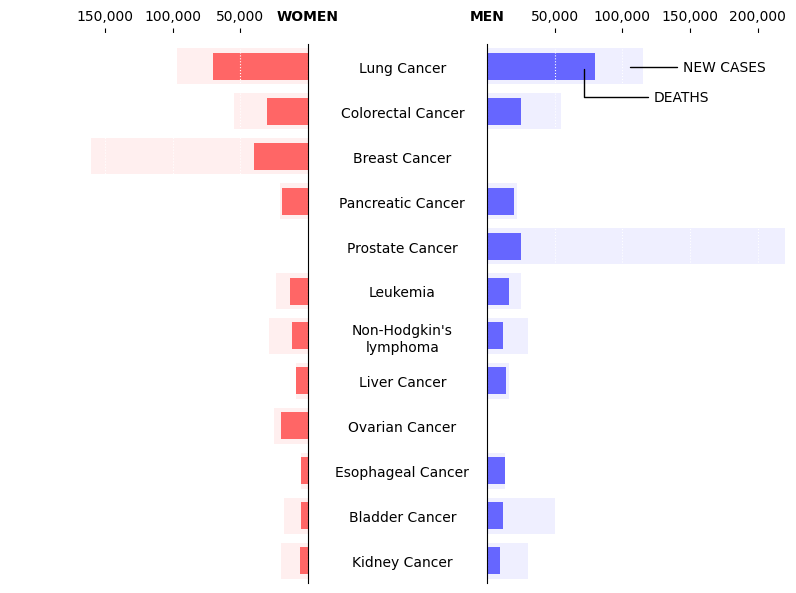

In [26]:
plt.style.use("default")
wspace_pos=.6
# LAYOUT
fig, (ax_left, ax_right) = plt.subplots(ncols = 2, figsize=(10,7), sharey=True)
fig.subplots_adjust(wspace=wspace_pos)

xsize = max(max(dt.women_cases),max(dt.men_cases))
ysize = len(dt.index)

ax_left.xaxis.set_ticks_position('top') #1
ax_left.yaxis.set_ticks_position('right')
ax_left.tick_params('y',length=0)
ax_left.spines.left.set_visible(False)
ax_left.spines.bottom.set_visible(False)
ax_left.spines.top.set_color('white')
ax_left.barh(y=dt.index,width=dt.women_cases,height=0.8,alpha=0.1,facecolor='#ff6666')
ax_left.barh(y=dt.index,width=dt.women_deaths,height=0.6,facecolor='#ff6666')
ax_left.grid(visible=True,axis='x',c='white',ls=':')
ax_left.set_xlim(-.5,xsize) #2A
ax_left.set_ylim(-.5,ysize-.5) #2B nie trzeba ustawiać right bo są sparowane
ax_left.spines['top'].set_position(('data',ysize-0.25))
ax_left.invert_xaxis() #3 jedyna różnica do right

#4
ax_right.spines.right.set_visible(False)
ax_right.spines.bottom.set_visible(False)
ax_right.spines.top.set_color('white')
ax_right.xaxis.set_ticks_position('top')
ax_right.tick_params('y',length=0)
ax_right.barh(y=dt.index,width=dt.men_cases,alpha=0.1,color='#6666ff')
ax_right.barh(y=dt.index,width=dt.men_deaths,height=0.6,color='#6666ff')
ax_right.grid(visible=True,axis='x',c='white',ls=':')
ax_right.spines['top'].set_position(('data',ysize-0.25))
ax_right.set_xlim(0,xsize)

# formatowanie pionowych etykiet
plt.setp(ax_left.get_yticklabels(), ha="center",position=(wspace_pos/2+1,0)) #5

xticks = np.arange(max(dt.women_cases),step=50000) #6
xlabels = ["{:,}".format(x) for x in xticks]
xlabels[0] = 'WOMEN'
ax_left.set_xticks(xticks,xlabels)
ax_left.get_xticklabels()[0].set_fontweight('bold') #do pojedynczych elementów
ax_left.get_xticklines()[1].set_markersize(0)


xticks = np.arange(max(dt.men_cases),step=50000)
xlabels = ["{:,}".format(x) for x in xticks]
xlabels[0] = 'MEN'
ax_right.set_xticks(xticks,xlabels)
ax_right.get_xticklabels()[0].set_fontweight('bold')
ax_right.get_xticklines()[1].set_markersize(0)

# adnotacje
x = dt.men_cases[-1]*0.9 #7 data coordinate
y = ysize-1
arrowprops = dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90,rad=0")
_ = ax_right.annotate('NEW CASES', xy=(x,y),  xycoords='data',
                   horizontalalignment='left', fontsize= 10,
                   xytext=(+40, -3), textcoords='offset points',
                   arrowprops=arrowprops)

x = dt.men_deaths[-1]*0.9 #data coordinate
_ = ax_right.annotate('DEATHS', xy=(x,y),  xycoords='data',
                   horizontalalignment='left', fontsize= 10,
                   xytext=(+50, -25), textcoords='offset points',
                   arrowprops=arrowprops)


Zadanie: 

> Napisać funkcję lub klasę, która pozoli wykonać podony wykres ale dla innego zbioru danych. Jako zbiór testowy wykorzystać zbiór `studia.csv`, załączony poniżej. Funkcja lub klasa powinny umożliwić modyfikację kolorów obu paneli. Należy zwrócić uwagę, że kolejność kolumn jest inna niż w zbiorze cancer, należy wskazać w definicji funkcji, które kolumny pełnią jaką rolę.

In [27]:
ds = pd.read_csv("dane/studia.csv",index_col='kierunki')
ds

,zaoczni_zapis,zaoczni_ukoncz,dzienni_zapis,dzienni_ukoncz
kierunki,,,,
Politologia,61,21,50,37
Kulturoznawstwo,33,19,70,11
Filozofia,11,10,44,14
Psychologia,128,25,60,58
Historia,17,4,22,9
Antropologia kultury,0,0,12,2
Socjologia,159,58,100,91
Obronność narodowa,149,13,100,81
Dziennikarstwo,45,41,60,52
